In [1]:
from sklearn.datasets import load_wine
from sklearn import model_selection as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics

In [5]:
from sklearn.tree import DecisionTreeClassifier

X, y = load_wine(return_X_y=True)
xtr, xts, ytr, yts = cv.train_test_split(X, y, test_size=0.3, random_state=1)

grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'min_samples_leaf': [2,4,6,8,10],
    'max_depth': [3, 4, 5, 6],
}

gcv = cv.GridSearchCV(DecisionTreeClassifier(random_state=1), n_jobs=-1, verbose=2, cv=4, param_grid=grid)
gcv.fit(xtr, ytr)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']},
             verbose=2)

In [6]:
gcv.score(xts, yts)

0.9074074074074074

In [7]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [11]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

X, y = load_diabetes(return_X_y=True)

xtr, xts, ytr, yts = cv.train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeRegressor(criterion='squared_error', splitter='random', max_leaf_nodes=10, random_state=1)
clf.fit(xtr, ytr)

clf.score(xtr, ytr)

0.5032060624566737

In [12]:
clf.score(xts, yts)

0.218771375137222

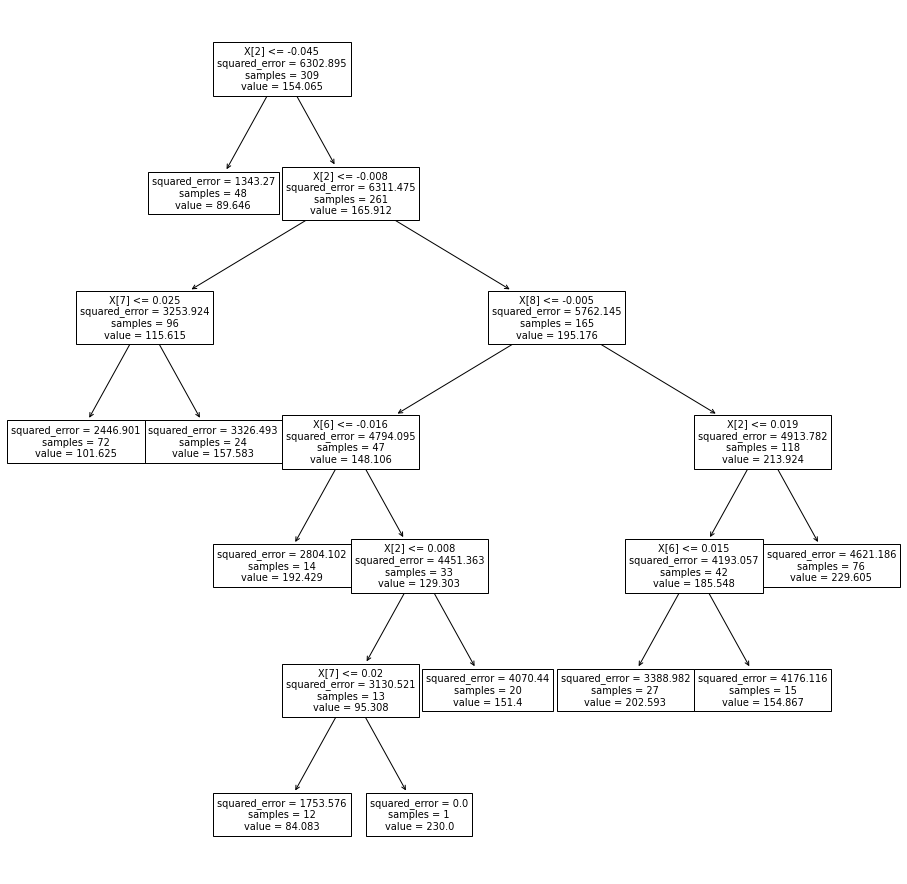

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 16))

_ = plot_tree(clf)

In [15]:
48/261

0.1839080459770115

In [28]:
xtr, xts, ytr, yts = cv.train_test_split(X, y, test_size=0.3, random_state=1)

dt = DecisionTreeRegressor(max_depth=4, random_state=1)

grid = dict(
    criterion=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    splitter=['random', 'best'],
    max_features=['auto', 'sqrt', 'log2'],
    ccp_alpha=[0.001, 0.01, 0.02, 0.05]
)

gcv = cv.GridSearchCV(dt, param_grid=grid, cv=4, n_jobs=-1, verbose=1)
gcv.fit(xtr, ytr)

gcv.best_params_

Fitting 4 folds for each of 96 candidates, totalling 384 fits


{'ccp_alpha': 0.02,
 'criterion': 'absolute_error',
 'max_features': 'auto',
 'splitter': 'best'}

In [21]:
gcv.score(xts, yts)

0.10873445074064803

In [22]:
gcv.best_params_

{'ccp_alpha': 0.02,
 'criterion': 'absolute_error',
 'max_features': 'auto',
 'splitter': 'best'}